In [17]:
# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter
%matplotlib inline

# 📥 Load dataset
file_path = "your_dataset.csv"  # Replace with your actual file path
df = pd.read_csv(r"Datasets\Global YouTube Statistics.csv", encoding='latin1')

# 🧹 Clean column names
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("%", "percent")
)

# 🧮 Convert applicable columns to numeric
numeric_cols = [
    'subscribers', 'video_views', 'uploads', 'video_views_rank', 'country_rank',
    'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
    'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings',
    'subscribers_for_last_30_days', 'gross_tertiary_education_enrollment_percent',
    'population', 'unemployment_rate', 'urban_population', 'latitude', 'longitude'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 🗓️ Convert 'created_date' to datetime
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')

# 🗑️ Drop rows where 'country' is NaN
df = df.dropna(subset=['country'])

# 🧠 Impute missing numeric values using group-wise (country) mean
df[numeric_cols] = df.groupby('country')[numeric_cols].transform(lambda x: x.fillna(x.mean()))

# 🔁 Fill remaining NaNs with global column means (if any still exist)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.dropna(subset=['subscribers', 'video_views'], inplace=True)  # essential columns
# 🕵️ Final dataset check
print("✅ Final dataset shape:", df.info)
print("🔍 Remaining missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])


✅ Final dataset shape: <bound method DataFrame.info of       rank                    youtuber  subscribers   video_views  \
0        1                    T-Series  245000000.0  2.280000e+11   
1        2              YouTube Movies  170000000.0  0.000000e+00   
2        3                     MrBeast  166000000.0  2.836884e+10   
3        4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4        5                   SET India  159000000.0  1.480000e+11   
...    ...                         ...          ...           ...   
1000   620                   MY FAMILY   15700000.0  6.153496e+09   
1002   787            Supercar Blondie   14100000.0  5.405563e+09   
1003   871        Just For Laughs Gags   13300000.0  7.406629e+09   
1004   872            Kabita's Kitchen   13300000.0  2.831276e+09   
1005   873                  BanderitaX   13300000.0  4.129249e+09   

              category                       title  uploads  \
0                Music                    T-Series   

# 1. What are the top 10 YouTube channels based on the number of subscribers?

C:\Users\sedhu\AppData\Local\Temp\ipykernel_2364\2613728580.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


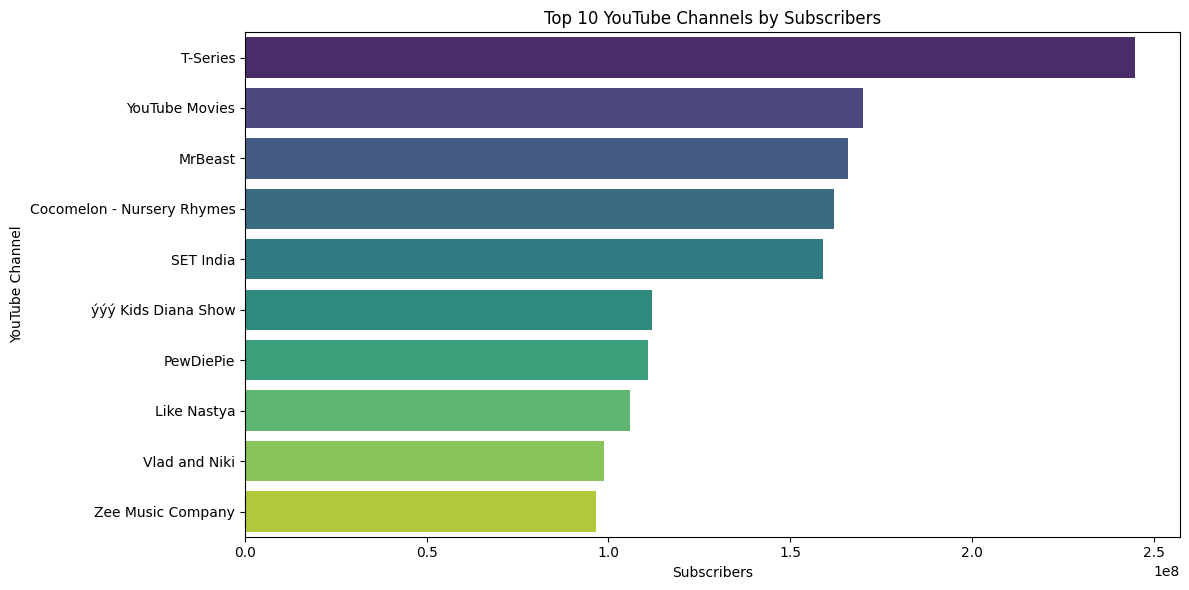

In [18]:
# 📊 Top 10 YouTube Channels by Subscribers
top_10_subscribers = df.sort_values(by='subscribers', ascending=False).head(10)

# Display the result
top_10_subscribers[['rank', 'youtuber', 'subscribers', 'category', 'country']]

# 📈 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_subscribers,
    x='subscribers',
    y='youtuber',
    palette='viridis'
)
plt.title('Top 10 YouTube Channels by Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('YouTube Channel')
plt.tight_layout()
plt.show()


# 2. Which category has the highest average number of subscribers?

🏆 Category with Highest Average Subscribers:
 category
Shows    4.350833e+07
Name: subscribers, dtype: float64


C:\Users\sedhu\AppData\Local\Temp\ipykernel_2364\421962736.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


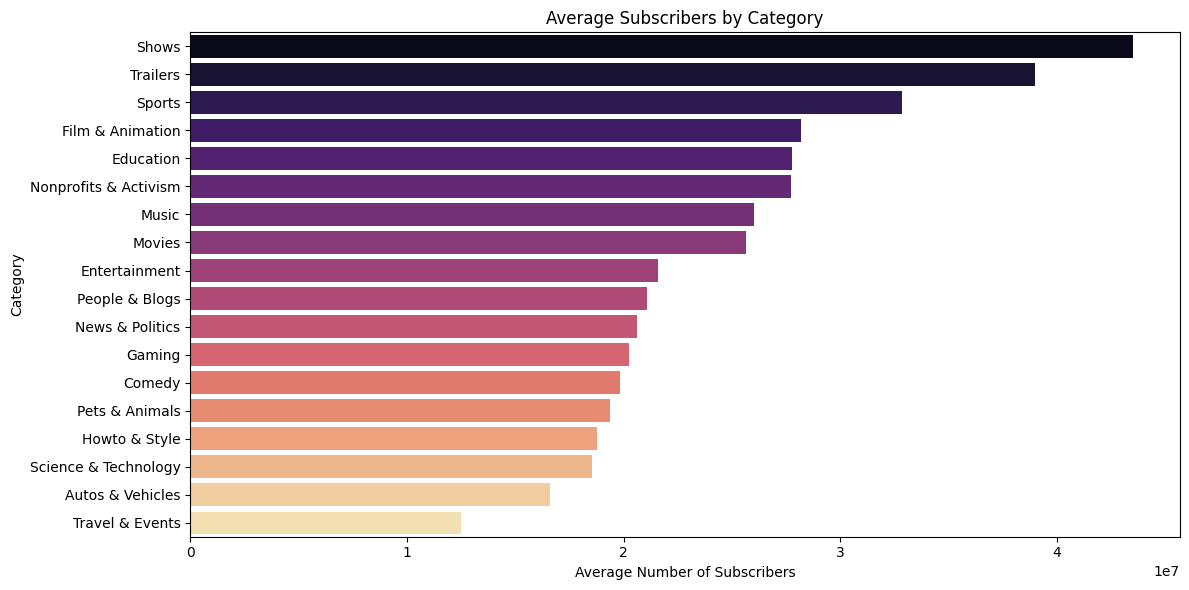

In [19]:
# 📊 Average number of subscribers by category
avg_subs_by_category = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)

# Display the category with the highest average subscribers
top_category = avg_subs_by_category.head(1)
print("🏆 Category with Highest Average Subscribers:\n", top_category)

# 📈 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_subs_by_category.values,
    y=avg_subs_by_category.index,
    palette='magma'
)
plt.title('Average Subscribers by Category')
plt.xlabel('Average Number of Subscribers')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


# 3. How many videos, on average, are uploaded by YouTube channels in each category?

📦 Average Uploads by Category:

category
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
Shows                     29730.666667
Sports                    19129.833333
Entertainment             13629.261905
People & Blogs            11654.592233
Trailers                   6839.000000
Pets & Animals             5932.666667
Gaming                     4754.829268
Movies                     3553.000000
Education                  3299.953488
Film & Animation           3183.166667
Music                      2573.541436
Science & Technology       2220.133333
Howto & Style              1819.529412
Autos & Vehicles           1550.666667
Comedy                     1233.088235
Travel & Events             766.000000
Name: uploads, dtype: float64


C:\Users\sedhu\AppData\Local\Temp\ipykernel_2364\163601216.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


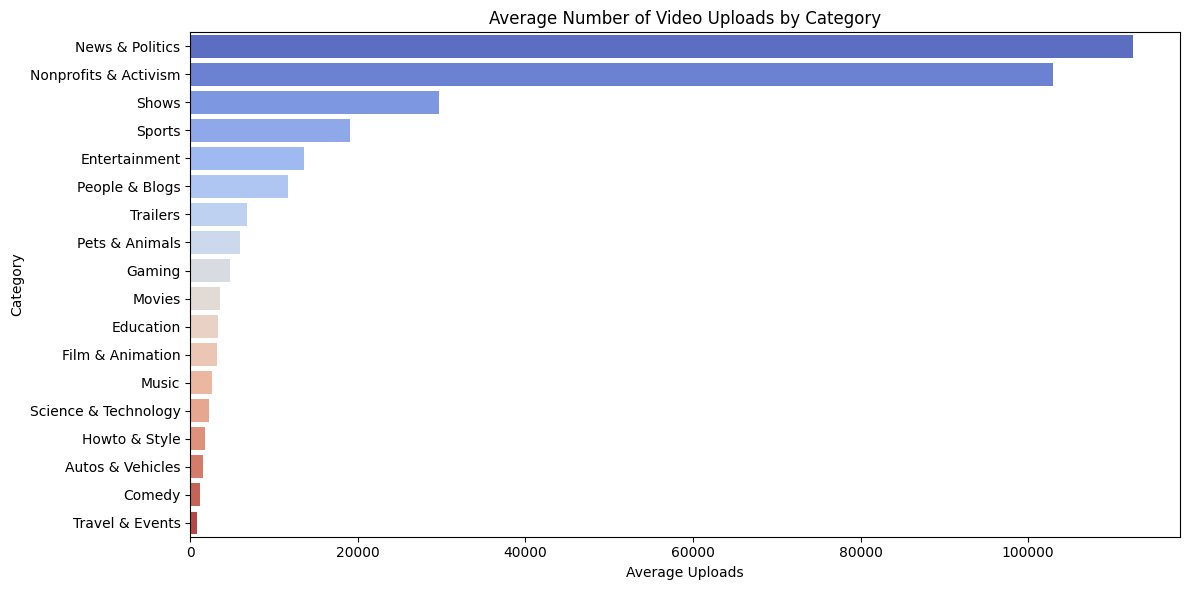

In [20]:
# 📊 Average uploads per category
avg_uploads_by_category = df.groupby('category')['uploads'].mean().sort_values(ascending=False)

# Display results
print("📦 Average Uploads by Category:\n")
print(avg_uploads_by_category)

# 📈 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_uploads_by_category.values,
    y=avg_uploads_by_category.index,
    palette='coolwarm'
)
plt.title('Average Number of Video Uploads by Category')
plt.xlabel('Average Uploads')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


#  4. What are the top 5 countries with the highest number of YouTube channels?

🌍 Top 5 Countries by Number of YouTube Channels:

country
United States     315
India             169
Brazil             62
United Kingdom     44
Mexico             33
Name: count, dtype: int64


C:\Users\sedhu\AppData\Local\Temp\ipykernel_2364\1486755397.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


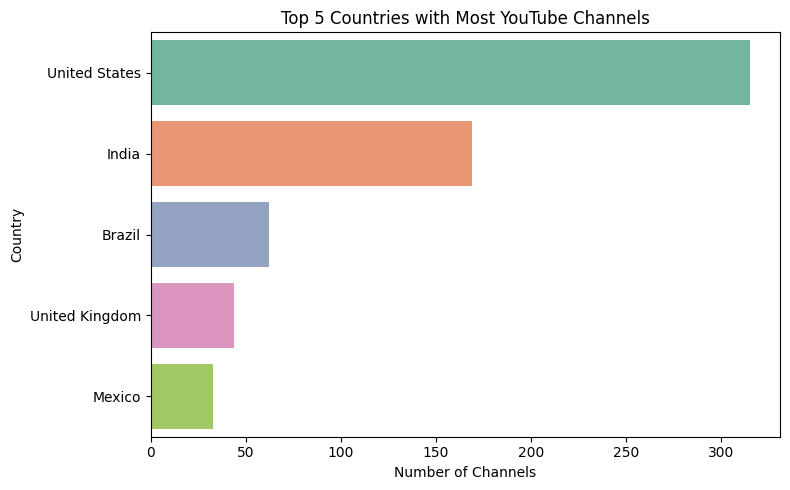

In [21]:
# 📊 Count of channels per country
top_5_countries = df['country'].value_counts().head(5)

# Display result
print("🌍 Top 5 Countries by Number of YouTube Channels:\n")
print(top_5_countries)

# 📈 Visualization
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_5_countries.values,
    y=top_5_countries.index,
    palette='Set2'
)
plt.title('Top 5 Countries with Most YouTube Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


 # 5. What is the distribution of channel types across different categories?

📋 Channel Type Distribution Across Categories:

channel_type           Animals  Autos  Comedy  Education  Entertainment  Film  \
category                                                                        
Autos & Vehicles             0      2       0          0              1     0   
Comedy                       0      0      38          0             20     1   
Education                    0      0       0         35              3     2   
Entertainment                0      1       5          2            158     6   
Film & Animation             0      0       1          2             13    13   
Gaming                       0      0       0          0             17     1   
Howto & Style                0      0       0          0              6     0   
Movies                       0      0       0          0              0     2   
Music                        0      0       0          1             12     4   
News & Politics              0      0       0          0     

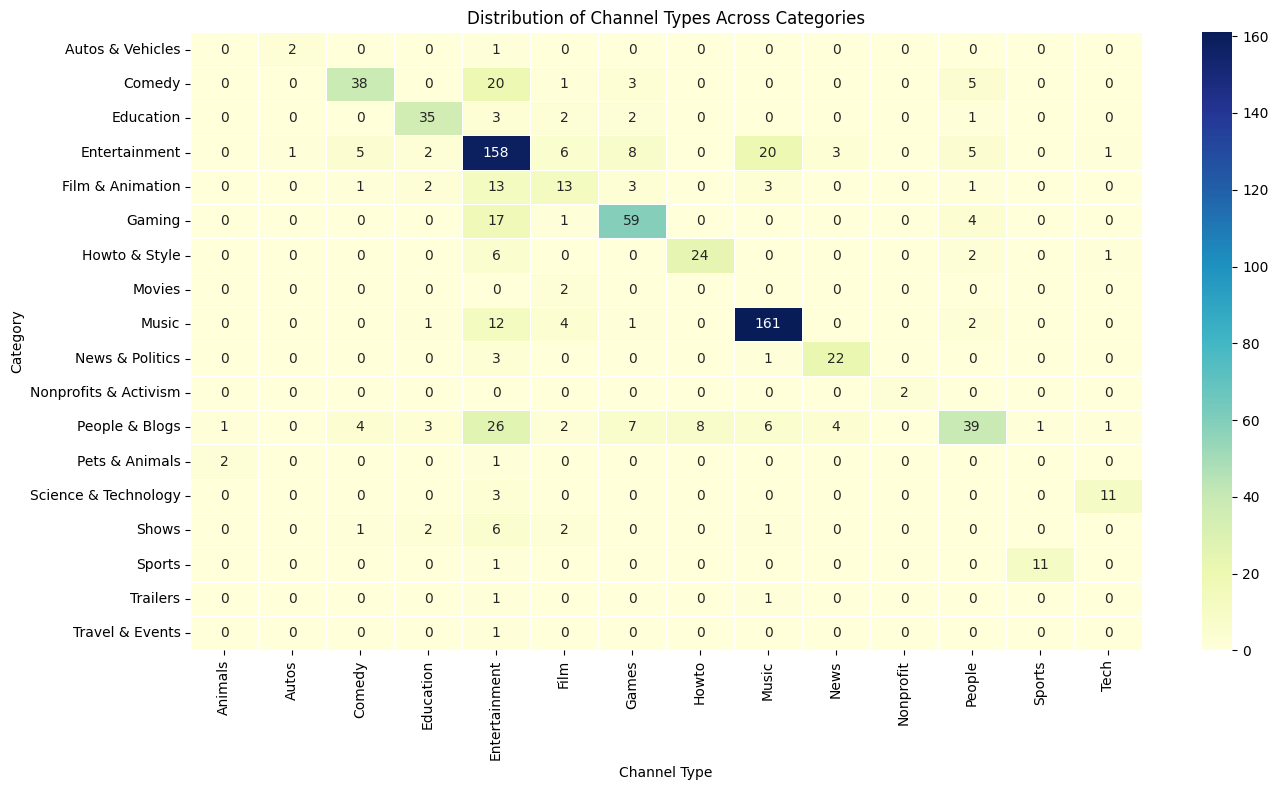

In [22]:
# 📊 Cross-tabulation of channel_type and category
channel_type_dist = pd.crosstab(df['category'], df['channel_type'])

# Display the table
print("📋 Channel Type Distribution Across Categories:\n")
print(channel_type_dist)

# 📈 Visualization: Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(channel_type_dist, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5)
plt.title('Distribution of Channel Types Across Categories')
plt.xlabel('Channel Type')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


 # 6. Is there a correlation between the number of subscribers and total video views for YouTube channels?

🔗 Correlation between Subscribers and Video Views: 0.7921


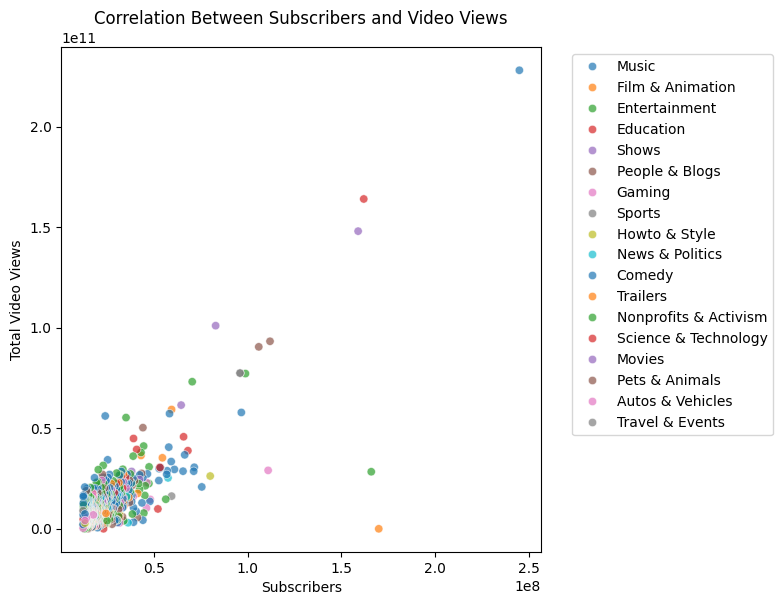

In [23]:
# 🔢 Correlation coefficient
correlation = df['subscribers'].corr(df['video_views'])
print(f"🔗 Correlation between Subscribers and Video Views: {correlation:.4f}")

# 📈 Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='subscribers',
    y='video_views',
    hue='category',
    alpha=0.7,
    palette='tab10'
)
plt.title('Correlation Between Subscribers and Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Total Video Views')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 7. How do the monthly earnings vary throughout different categories?

💰 Average Monthly Earnings by Category:

                       lowest_monthly_earnings  highest_monthly_earnings
category                                                                
Shows                            137541.666667              2.207467e+06
Autos & Vehicles                  74966.666667              1.190900e+06
Pets & Animals                    66633.333333              1.059233e+06
Sports                            60783.333333              9.813583e+05
Education                         49716.488605              7.975791e+05
Film & Animation                  44947.611111              7.186940e+05
Entertainment                     41320.920286              6.602103e+05
Comedy                            41081.544118              6.556353e+05
News & Politics                   40192.625000              6.426320e+05
Music                             37635.642873              6.008518e+05
People & Blogs                    35583.068738              5.688403e+05
Movies    

<Figure size 1200x600 with 0 Axes>

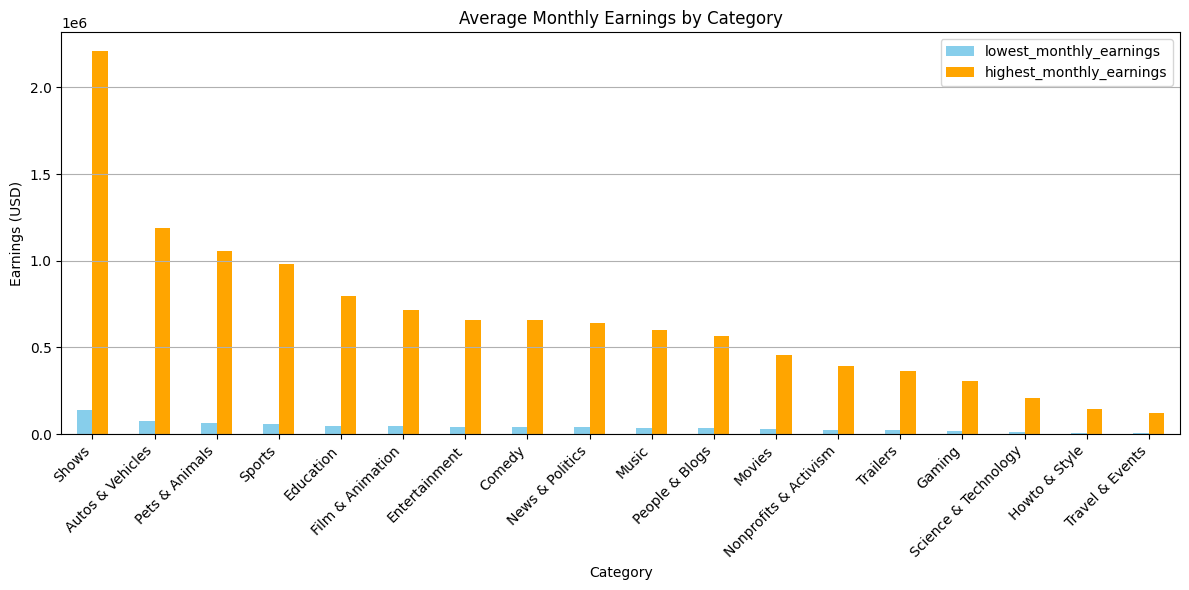

In [24]:
# 📊 Group by category and get average monthly earnings
monthly_earnings_stats = df.groupby('category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean().sort_values(by='highest_monthly_earnings', ascending=False)

# Display summary
print("💰 Average Monthly Earnings by Category:\n")
print(monthly_earnings_stats)

# 📈 Visualization
plt.figure(figsize=(12, 6))
monthly_earnings_stats.plot(kind='bar', figsize=(12,6), color=['skyblue', 'orange'])
plt.title('Average Monthly Earnings by Category')
plt.xlabel('Category')
plt.ylabel('Earnings (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


#  8. What is the overall trend in subscribers gained in the last 30 days across all channels?

📈 Total Subscribers Gained in Last 30 Days: 303,206,946.85801


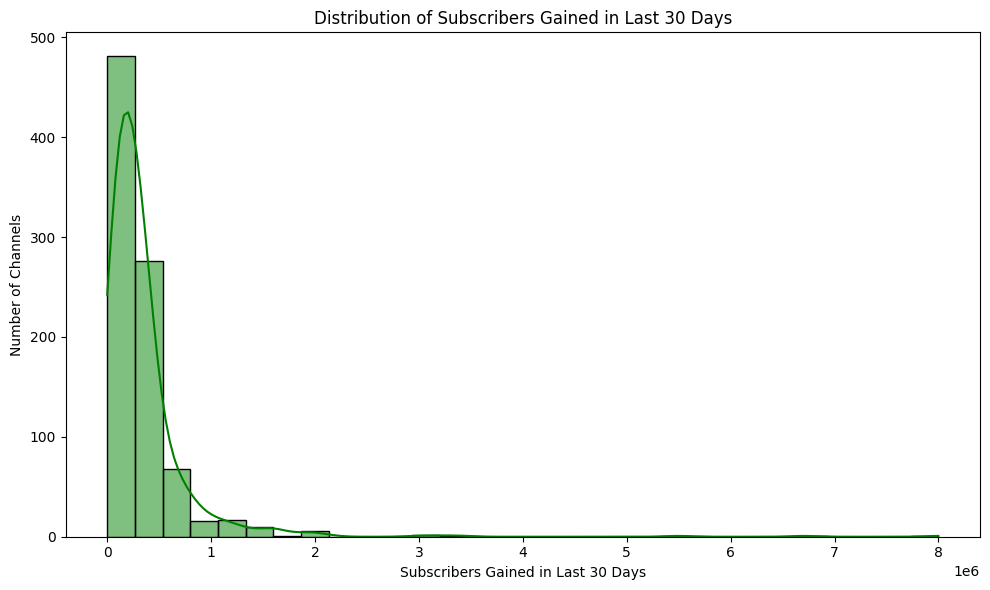

In [25]:
# 🔢 Total subscribers gained in last 30 days
total_subs_last_30_days = df['subscribers_for_last_30_days'].sum()
print(f"📈 Total Subscribers Gained in Last 30 Days: {total_subs_last_30_days:,}")

# 📊 Distribution of subscribers gained in last 30 days
plt.figure(figsize=(10, 6))
sns.histplot(df['subscribers_for_last_30_days'], bins=30, kde=True, color='green')
plt.title('Distribution of Subscribers Gained in Last 30 Days')
plt.xlabel('Subscribers Gained in Last 30 Days')
plt.ylabel('Number of Channels')
plt.tight_layout()
plt.show()


# 9. Are there any outliers in terms of yearly earnings from YouTube channels?

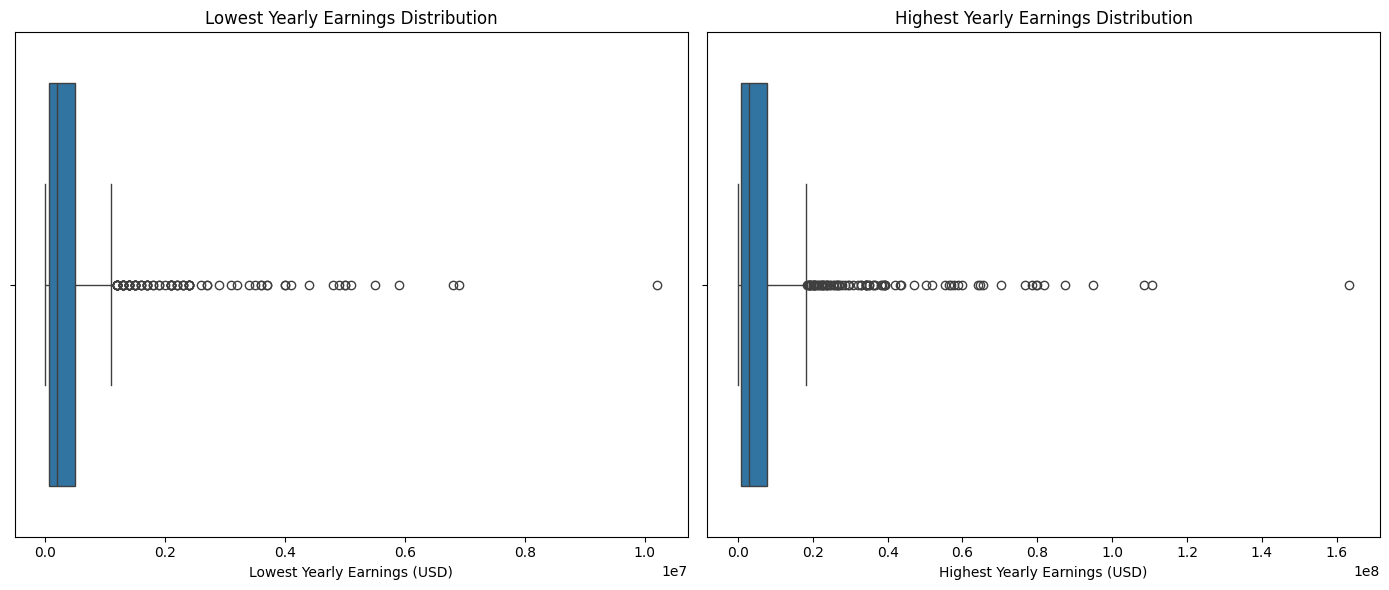

In [26]:
# 📊 Boxplots to detect outliers in yearly earnings
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['lowest_yearly_earnings'])
plt.title('Lowest Yearly Earnings Distribution')
plt.xlabel('Lowest Yearly Earnings (USD)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['highest_yearly_earnings'])
plt.title('Highest Yearly Earnings Distribution')
plt.xlabel('Highest Yearly Earnings (USD)')

plt.tight_layout()
plt.show()


# 10. What is the distribution of channel creation dates? Is there any trend over time?

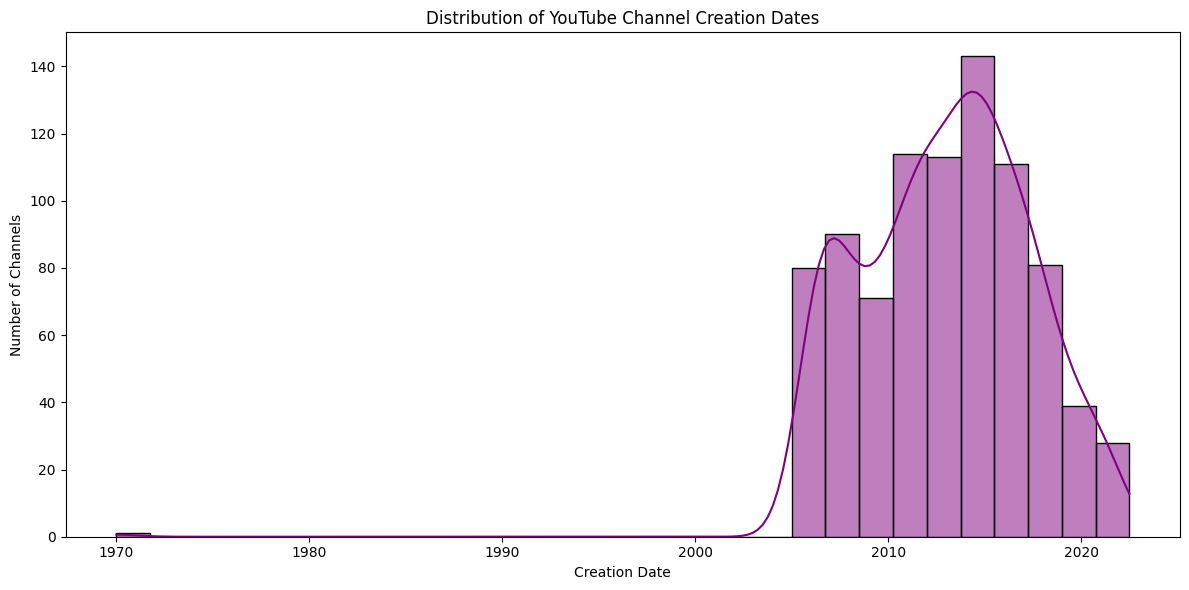

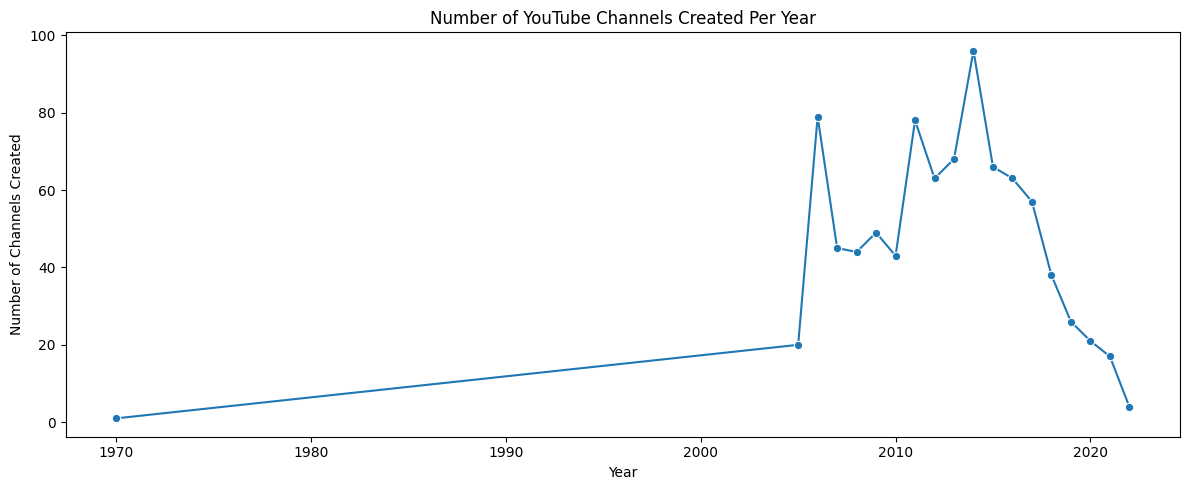

In [29]:
# 📅 Create datetime column for channel creation
# Convert month to numeric
df['created_month_num'] = pd.to_datetime(df['created_month'], format='%b', errors='coerce').dt.month

# Fix created_date: coerce non-numeric to NaN, fill with 1, and convert to int
df['created_date_clean'] = pd.to_numeric(df['created_date'], errors='coerce').fillna(1).astype(int)

# Construct a full datetime column
df['created_date_full'] = pd.to_datetime({
    'year': df['created_year'],
    'month': df['created_month_num'],
    'day': df['created_date_clean']
}, errors='coerce')

# Plot distribution of creation dates
plt.figure(figsize=(12, 6))
sns.histplot(df['created_date_full'], bins=30, kde=True, color='purple')
plt.title('Distribution of YouTube Channel Creation Dates')
plt.xlabel('Creation Date')
plt.ylabel('Number of Channels')
plt.tight_layout()
plt.show()

# Optional: Trend over years
channels_per_year = df['created_year'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x=channels_per_year.index, y=channels_per_year.values, marker='o')
plt.title('Number of YouTube Channels Created Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Channels Created')
plt.tight_layout()
plt.show()


# 11. Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

                 country  channel_count  \
0          United States            315   
1                  India            169   
2                 Brazil             62   
3         United Kingdom             44   
4                 Mexico             33   
5              Indonesia             28   
6                  Spain             22   
7               Thailand             18   
8            South Korea             17   
9                 Russia             16   
10                Canada             15   
11             Argentina             13   
12           Philippines             12   
13              Colombia             11   
14          Saudi Arabia             10   
15             Australia              9   
16               Ukraine              8   
17  United Arab Emirates              8   
18               Germany              6   
19              Pakistan              6   
20                 Japan              5   
21                France              5   
22         

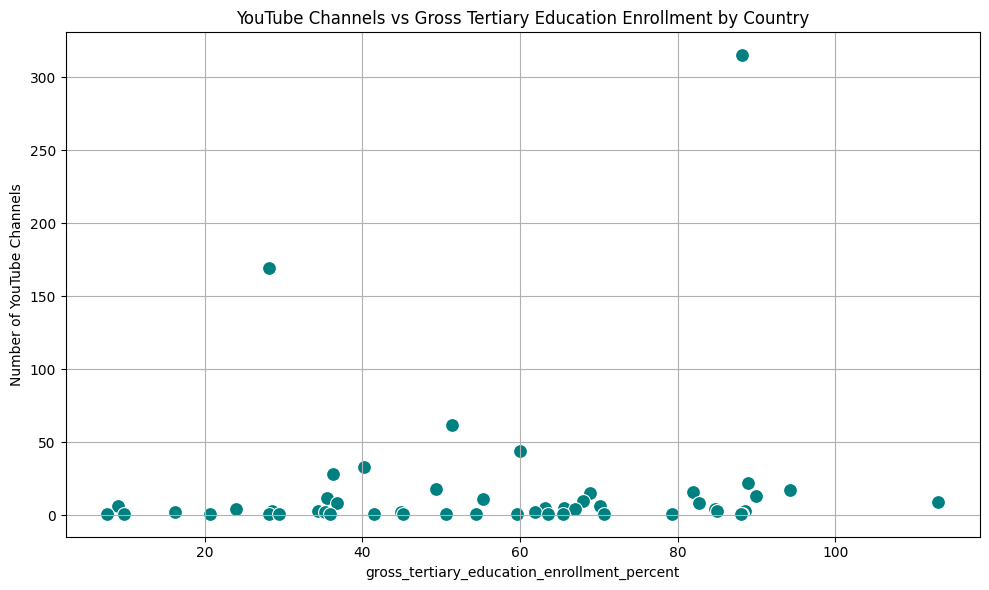

In [45]:
# Aggregate number of channels per country
channels_per_country = df['country'].value_counts().rename_axis('country').reset_index(name='channel_count')

# Calculate average gross tertiary education enrollment per country
education_enrollment = df.groupby('country')['gross_tertiary_education_enrollment_percent'].mean().reset_index()

# Merge dataframes
country_education = pd.merge(channels_per_country, education_enrollment, on='country')

# Display merged data
print(country_education)

# Calculate correlation
corr = country_education['channel_count'].corr(country_education['gross_tertiary_education_enrollment_percent'])
print(f"\n🔗 Correlation between Number of Channels and Gross Tertiary Education Enrollment: {corr:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_education,
    x='gross_tertiary_education_enrollment_percent',
    y='channel_count',
    s=100,
    color='teal'
)
plt.title('YouTube Channels vs Gross Tertiary Education Enrollment by Country')
plt.xlabel('gross_tertiary_education_enrollment_percent')
plt.ylabel('Number of YouTube Channels')
plt.grid(True)
plt.tight_layout()
plt.show()


#  12. How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

📝 Average Unemployment Rates for Top 10 Countries by YouTube Channels:

country
Thailand           0.75
Mexico             3.42
United Kingdom     3.85
South Korea        4.15
Russia             4.59
Indonesia          4.69
India              5.36
Brazil            12.08
Spain             13.96
United States     14.70
Name: unemployment_rate, dtype: float64


C:\Users\sedhu\AppData\Local\Temp\ipykernel_2364\1375176049.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


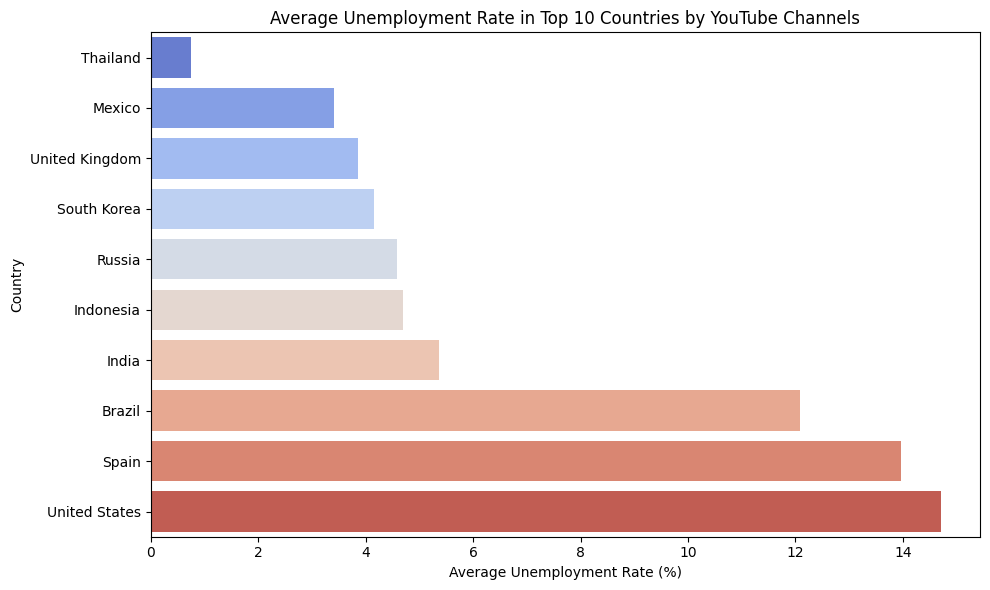

In [48]:
# Top 10 countries by number of YouTube channels
top_10_countries = df['country'].value_counts().head(10).index.tolist()

# Filter dataset for these countries
top_10_data = df[df['country'].isin(top_10_countries)]

# Calculate average unemployment rate per country
unemployment_stats = top_10_data.groupby('country')['unemployment_rate'].mean().sort_values()

print("📝 Average Unemployment Rates for Top 10 Countries by YouTube Channels:\n")
print(unemployment_stats)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x=unemployment_stats.values,
    y=unemployment_stats.index,
    palette='coolwarm'
)
plt.title('Average Unemployment Rate in Top 10 Countries by YouTube Channels')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


# 13. What is the average urban population percentage in countries with YouTube channels?

🏙️ Average Urban Population Percentage (Across Countries with YouTube Channels): 80841809.08%


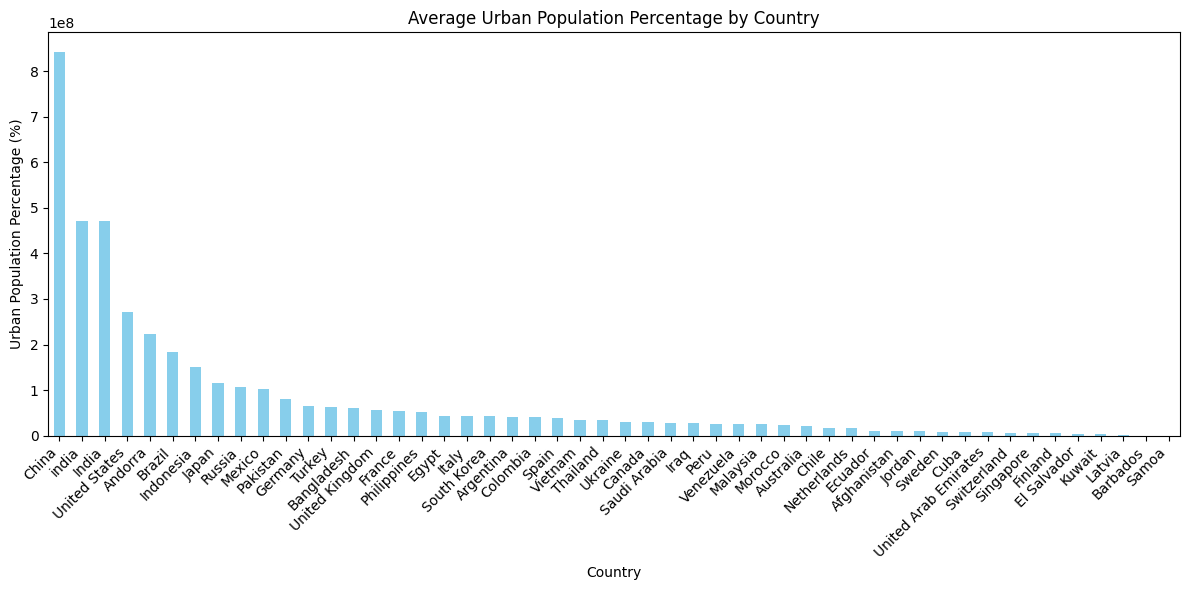

In [49]:
# Average urban population percentage by country
avg_urban_population = df.groupby('country')['urban_population'].mean()

# Overall average across countries
overall_avg_urban_pop = avg_urban_population.mean()

print(f"🏙️ Average Urban Population Percentage (Across Countries with YouTube Channels): {overall_avg_urban_pop:.2f}%")

# Optional: visualize urban population percentage by country
plt.figure(figsize=(12, 6))
avg_urban_population.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Urban Population Percentage by Country')
plt.xlabel('Country')
plt.ylabel('Urban Population Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 14. Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

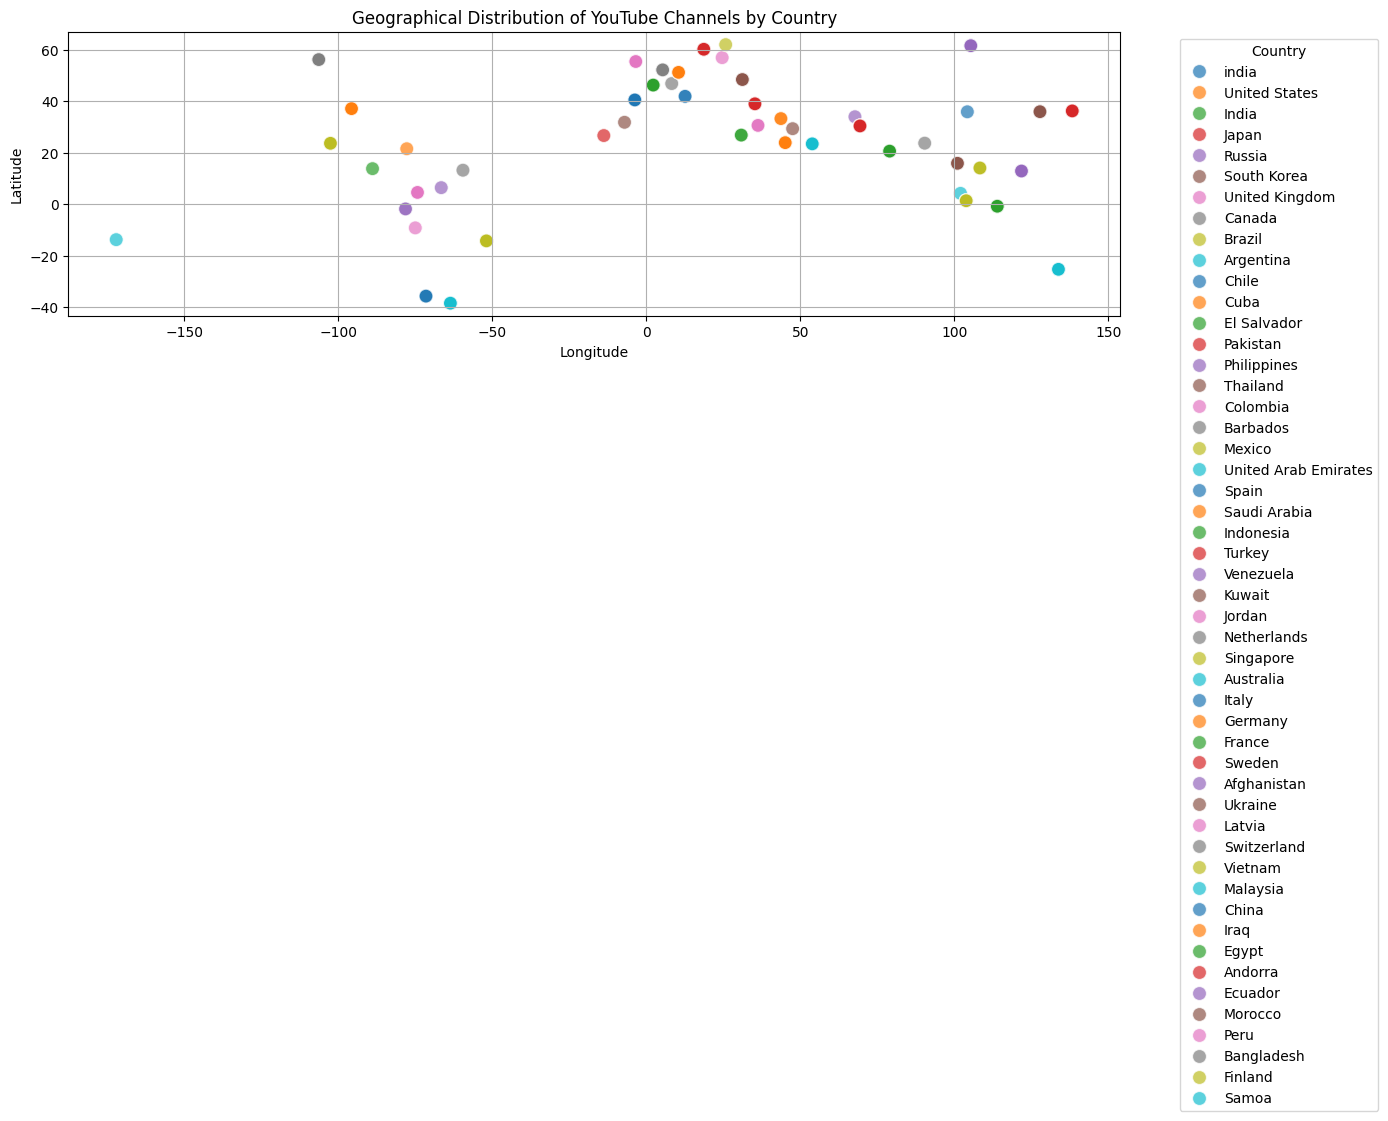

In [50]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='longitude', y='latitude',
    data=df,
    hue='country',
    palette='tab10',
    s=100,
    alpha=0.7,
    legend='full'
)
plt.title('Geographical Distribution of YouTube Channels by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# 15. What is the correlation between the number of subscribers and the population of a country?

🔗 Correlation between Total Subscribers and Population: 0.3328


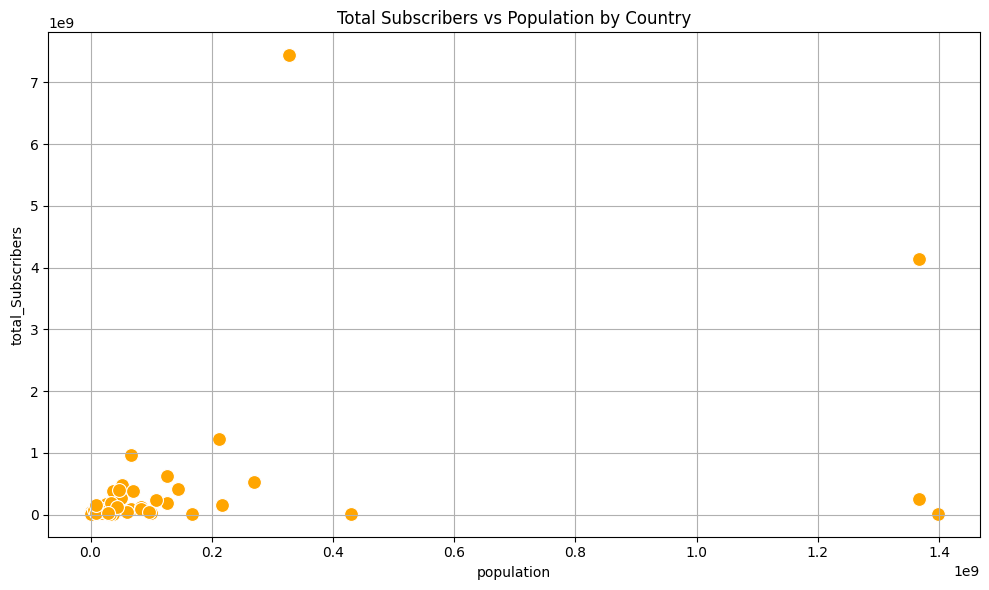

In [53]:
# Aggregate total subscribers by country
subscribers_per_country = df.groupby('country')['subscribers'].sum().reset_index()

# Extract unique population per country (assuming population is constant per country)
population_per_country = df.groupby('country')['population'].first().reset_index()

# Merge datasets
country_sub_pop = pd.merge(subscribers_per_country, population_per_country, on='country')

# Calculate correlation
corr_sub_pop = country_sub_pop['subscribers'].corr(country_sub_pop['population'])
print(f"🔗 Correlation between Total Subscribers and Population: {corr_sub_pop:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_sub_pop,
    x='population',
    y='subscribers',
    s=100,
    color='orange'
)
plt.title('Total Subscribers vs Population by Country')
plt.xlabel('population')
plt.ylabel('total_Subscribers')
plt.grid(True)
plt.tight_layout()
plt.show()


# 16. How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

C:\Users\sedhu\AppData\Local\Temp\ipykernel_2364\2365472782.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


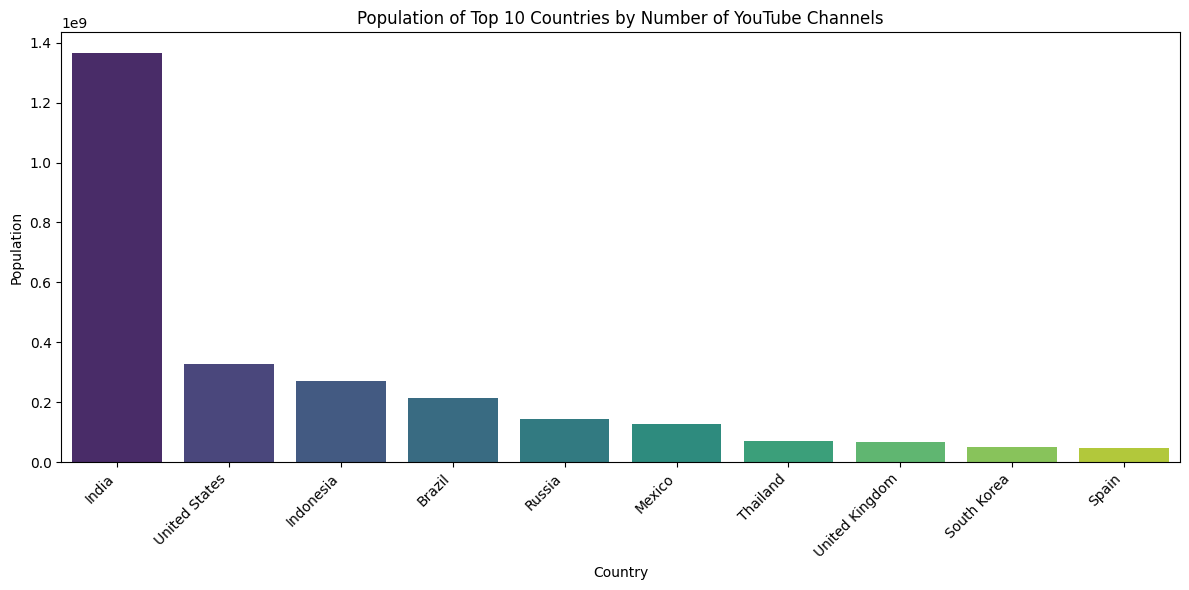

In [55]:
# Top 10 countries by YouTube channel count
top_10_countries = df['country'].value_counts().head(10).index.tolist()

# Extract population for these countries (assuming population is consistent per country)
pop_top_10 = df[df['country'].isin(top_10_countries)].groupby('country')['population'].first().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    x=pop_top_10.index,
    y=pop_top_10.values,
    palette='viridis'
)
plt.title('Population of Top 10 Countries by Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 17. Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

🔗 Correlation between Subscribers Gained (Last 30 Days) and Unemployment Rate: -0.0635


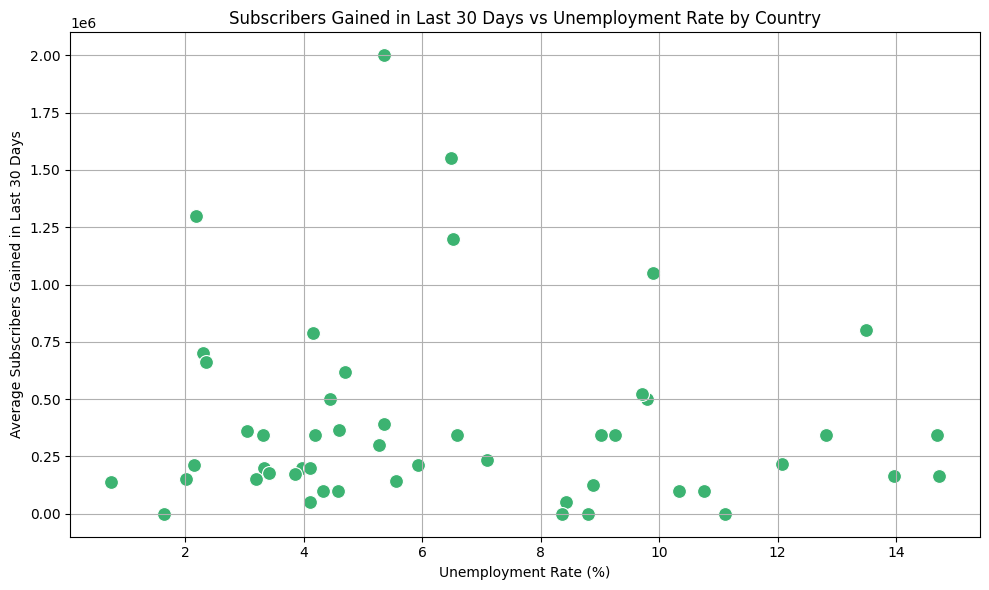

In [56]:
# Average subscribers gained in last 30 days and unemployment rate per country
subs_unemp = df.groupby('country').agg({
    'subscribers_for_last_30_days': 'mean',
    'unemployment_rate': 'mean'
}).reset_index()

# Correlation
corr_subs_unemp = subs_unemp['subscribers_for_last_30_days'].corr(subs_unemp['unemployment_rate'])
print(f"🔗 Correlation between Subscribers Gained (Last 30 Days) and Unemployment Rate: {corr_subs_unemp:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=subs_unemp,
    x='unemployment_rate',
    y='subscribers_for_last_30_days',
    s=100,
    color='mediumseagreen'
)
plt.title('Subscribers Gained in Last 30 Days vs Unemployment Rate by Country')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Average Subscribers Gained in Last 30 Days')
plt.grid(True)
plt.tight_layout()
plt.show()


# 18. How does the distribution of video views for the last 30 days vary across different channel types?

C:\Users\sedhu\AppData\Local\Temp\ipykernel_2364\1328095669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


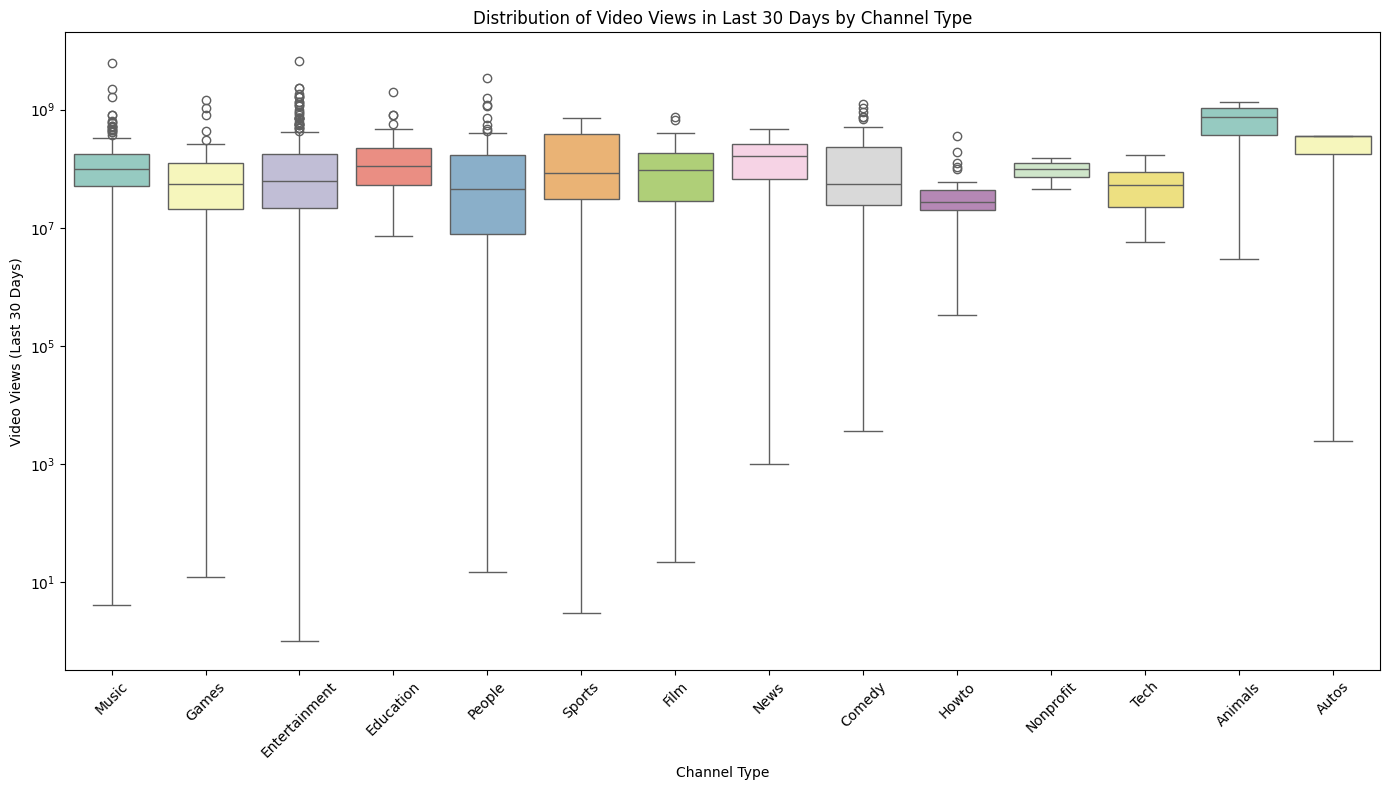

In [57]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='channel_type',
    y='video_views_for_the_last_30_days',
    data=df,
    palette='Set3'
)
plt.title('Distribution of Video Views in Last 30 Days by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Video Views (Last 30 Days)')
plt.yscale('log')  # Use log scale for better visualization if data is skewed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  19. Are there any seasonal trends in the number of videos uploaded by YouTube channels?

C:\Users\sedhu\AppData\Local\Temp\ipykernel_2364\402194451.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uploads_by_month = df.groupby('created_month')['uploads'].mean()


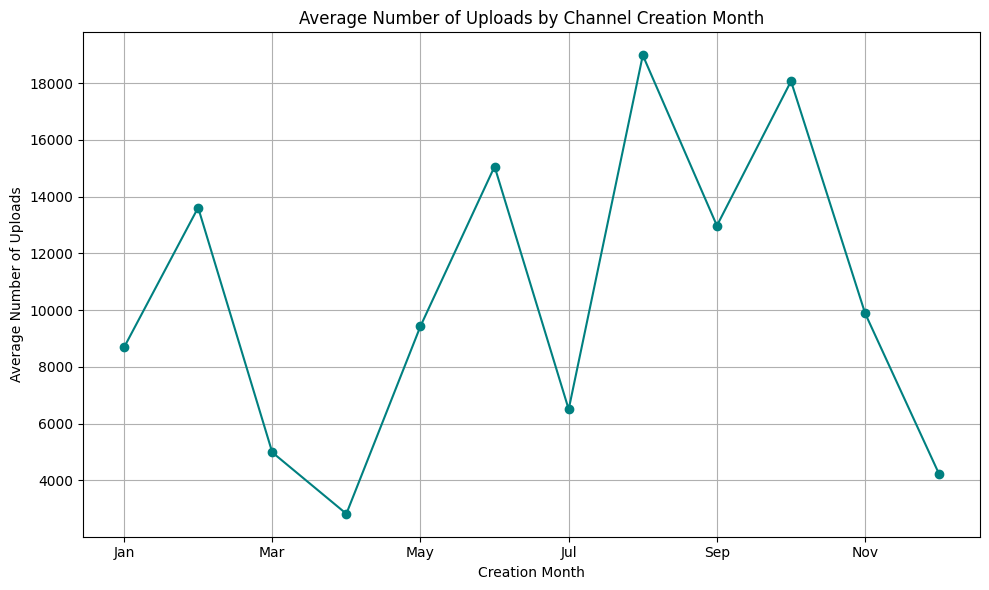

In [58]:
# Convert 'created_month' to categorical month numbers for ordering
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['created_month'] = pd.Categorical(df['created_month'], categories=month_order, ordered=True)

# Average uploads by creation month
uploads_by_month = df.groupby('created_month')['uploads'].mean()

# Plotting
plt.figure(figsize=(10,6))
uploads_by_month.plot(marker='o', linestyle='-', color='teal')
plt.title('Average Number of Uploads by Channel Creation Month')
plt.xlabel('Creation Month')
plt.ylabel('Average Number of Uploads')
plt.grid(True)
plt.tight_layout()
plt.show()


# 20. What is the average number of subscribers gained per month since the creation of YouTube channels till now?

In [60]:
from datetime import datetime

# Combine creation year, month, and date to a datetime object
def parse_creation_date(row):
    try:
        return datetime.strptime(f"{int(row['created_year'])} {row['created_month']} {int(row['created_date'])}", "%Y %b %d")
    except:
        # If day missing or invalid, default to 1st of the month
        try:
            return datetime.strptime(f"{int(row['created_year'])} {row['created_month']} 1", "%Y %b %d")
        except:
            return pd.NaT

df['creation_date'] = df.apply(parse_creation_date, axis=1)

# Current date
now = datetime.now()

# Calculate months difference
def months_diff(start_date, end_date):
    if pd.isna(start_date):
        return None
    return (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)

df['months_since_creation'] = df['creation_date'].apply(lambda x: months_diff(x, now))

# Calculate average subscribers gained per month
df['avg_subs_per_month'] = df.apply(
    lambda row: row['subscribers'] / row['months_since_creation'] if row['months_since_creation'] and row['months_since_creation'] > 0 else None,
    axis=1
)

# Display average across all channels
overall_avg_subs_per_month = df['avg_subs_per_month'].mean()

print(f"📈 Average Subscribers Gained Per Month Since Channel Creation: {overall_avg_subs_per_month:.2f}")

# Optional: Top 10 channels by avg subscribers gained per month
top_avg_growth = df[['youtuber', 'avg_subs_per_month']].dropna().sort_values(by='avg_subs_per_month', ascending=False).head(10)
print("\nTop 10 Channels by Average Subscribers Gained Per Month:")
print(top_avg_growth)


📈 Average Subscribers Gained Per Month Since Channel Creation: 171204.00

Top 10 Channels by Average Subscribers Gained Per Month:
                      youtuber  avg_subs_per_month
16             5-Minute Crafts        1.381034e+06
9                Vlad and Niki        1.163529e+06
0                     T-Series        1.065217e+06
2                      MrBeast        1.044025e+06
8                  Like Nastya        9.464286e+05
6          ýýý Kids Diana Show        9.333333e+05
13                   BLACKPINK        8.392523e+05
27       T-Series Bhakti Sagar        7.530864e+05
3   Cocomelon - Nursery Rhymes        7.232143e+05
10           Zee Music Company        7.216418e+05
